<h1>Maritime: Collision</h1>

<h4>Selecting relevant rows</h4>

In [ ]:
# --- IGNORE CUS IT WAS RAN ONCE ALREADY --- 
# import pandas as pd
# import ast

# # Load CSV and parse JSON-like fields
# df = pd.read_csv("gfw_encounters_recent.csv",
#                  converters={
#                      'boundingBox': ast.literal_eval,
#                      'regions__mpa': ast.literal_eval,
#                      'regions__eez': ast.literal_eval,
#                      'regions__rfmo': ast.literal_eval,
#                      'regions__fao': ast.literal_eval,
#                      'regions__majorFao': ast.literal_eval,
#                      'regions__eez12Nm': ast.literal_eval,
#                      'regions__highSeas': ast.literal_eval,
#                      'regions__mpaNoTakePartial': ast.literal_eval,
#                      'regions__mpaNoTake': ast.literal_eval
#                  })

# # Select useful columns for collision risk
# risk_cols = [
#     "start", "end",
#     "position__lat", "position__lon", "boundingBox",
#     "distances__startDistanceFromShoreKm", "distances__endDistanceFromShoreKm",
#     "distances__startDistanceFromPortKm", "distances__endDistanceFromPortKm",
#     "encounter__medianDistanceKilometers", "encounter__medianSpeedKnots",
#     "encounter__potentialRisk",
#     "vessel__id", "vessel__ssvid", "vessel__flag", "vessel__type",
#     "encounter__vessel__id", "encounter__vessel__ssvid",
#     "encounter__vessel__flag", "encounter__vessel__type"
# ]

# df_risk = df[risk_cols].copy()

# # Convert times to datetime
# df_risk["start"] = pd.to_datetime(df_risk["start"])
# df_risk["end"] = pd.to_datetime(df_risk["end"])

# # Encounter duration
# df_risk["duration_hours"] = (df_risk["end"] - df_risk["start"]).dt.total_seconds() / 3600

# # Quick filter: potentially high collision risk if distance < 1 km
# df_high_risk = df_risk[df_risk["encounter__medianDistanceKilometers"] < 1]

# print("Cleaned dataset shape:", df_risk.shape)
# print("High-risk encounters (<1km):", len(df_high_risk))
# pd.to_csv(df_risk, "collision/collision_risk.csv", index=False)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

df = pd.read_csv('collision/collision_risk.csv', parse_dates=['start', 'end'])
df.head(5)

,start,end,position__lat,position__lon,boundingBox,distances__startDistanceFromShoreKm,distances__endDistanceFromShoreKm,distances__startDistanceFromPortKm,distances__endDistanceFromPortKm,encounter__medianDistanceKilometers,...,encounter__potentialRisk,vessel__id,vessel__ssvid,vessel__flag,vessel__type,encounter__vessel__id,encounter__vessel__ssvid,encounter__vessel__flag,encounter__vessel__type,duration_hours
0,2025-03-08 06:20:00+00:00,2025-03-21 03:20:00+00:00,19.5021,57.7414,"[57.74136833191366, 19.50214031613387, 57.7413...",3,3,17.914146,17.914146,0.339,...,False,35f7c13c7-7ddc-d6a8-4252-b615bfa6fe24,412549027,CHN,fishing,0c0e88655-5f69-0418-5816-5f48e386114c,412549025,CHN,fishing,309.000000
1,2025-03-08 06:20:00+00:00,2025-03-21 03:20:00+00:00,19.5021,57.7414,"[57.74136833191366, 19.50214031613387, 57.7413...",3,3,17.914146,17.914146,0.339,...,False,0c0e88655-5f69-0418-5816-5f48e386114c,412549025,CHN,fishing,35f7c13c7-7ddc-d6a8-4252-b615bfa6fe24,412549027,CHN,fishing,309.000000
2,2025-03-10 05:30:00+00:00,2025-03-23 18:10:00+00:00,19.4810,57.7305,"[57.73049860026026, 19.480987069680477, 57.730...",2,2,20.042490,20.042490,0.168,...,False,77a0b9ae4-4858-2987-03ee-ed478f1606a0,271072244,TUR,fishing,5338bdfbb-b05d-4925-74d2-4c1513da65df,461000153,OMN,fishing,324.666667
3,2025-03-10 05:30:00+00:00,2025-03-23 18:10:00+00:00,19.4810,57.7305,"[57.73049860026026, 19.480987069680477, 57.730...",2,2,20.042490,20.042490,0.168,...,False,5338bdfbb-b05d-4925-74d2-4c1513da65df,461000153,OMN,fishing,77a0b9ae4-4858-2987-03ee-ed478f1606a0,271072244,TUR,fishing,324.666667
4,2025-03-10 20:00:00+00:00,2025-03-20 18:00:00+00:00,48.3927,-64.4927,"[-64.49272469604246, 48.39265884949554, -64.49...",2,2,39.465820,39.465820,0.054,...,False,60797c0ec-c710-ecba-567d-fa48b79250b4,316004122,CAN,fishing,59b22876a-a3ca-6dce-7e85-b0b3a67f8b49,316008008,CAN,fishing,238.000000


<h4>EDA + Cleaning data</h4>

In [2]:
print("rows, cols:", df.shape)
print("time range:", df['start'].min(), "→", df['end'].max())
print("unique vessels (col vessel__id):", df['vessel__id'].nunique())
print("unique encounter partners:", df['encounter__vessel__id'].nunique())

rows, cols: (8000, 21)
time range: 2025-03-08 06:20:00+00:00 → 2025-04-17 20:00:00+00:00
unique vessels (col vessel__id): 2777
unique encounter partners: 2777


In [3]:
df.isna().sum()


start                                    0
end                                      0
position__lat                            0
position__lon                            0
boundingBox                              0
distances__startDistanceFromShoreKm      0
distances__endDistanceFromShoreKm        0
distances__startDistanceFromPortKm       0
distances__endDistanceFromPortKm         0
encounter__medianDistanceKilometers      0
encounter__medianSpeedKnots              0
encounter__potentialRisk                 0
vessel__id                               0
vessel__ssvid                            0
vessel__flag                           590
vessel__type                             0
encounter__vessel__id                    0
encounter__vessel__ssvid                 0
encounter__vessel__flag                590
encounter__vessel__type                  0
duration_hours                           0
dtype: int64

In [4]:
# replace NaN flag with 'MISSING'; not dropping because it's may be a useful feature
df['vessel__flag'].fillna('MISSING', inplace=True)
df['encounter__vessel__flag'].fillna('MISSING', inplace=True)

/var/folders/q0/l7dmy8x535g5clgjv2m_0pnm0000gn/T/ipykernel_77209/2848861823.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['vessel__flag'].fillna('MISSING', inplace=True)
/var/folders/q0/l7dmy8x535g5clgjv2m_0pnm0000gn/T/ipykernel_77209/2848861823.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [5]:
# to double confirm that there is no missing flag now
df.isna().sum()

start                                  0
end                                    0
position__lat                          0
position__lon                          0
boundingBox                            0
distances__startDistanceFromShoreKm    0
distances__endDistanceFromShoreKm      0
distances__startDistanceFromPortKm     0
distances__endDistanceFromPortKm       0
encounter__medianDistanceKilometers    0
encounter__medianSpeedKnots            0
encounter__potentialRisk               0
vessel__id                             0
vessel__ssvid                          0
vessel__flag                           0
vessel__type                           0
encounter__vessel__id                  0
encounter__vessel__ssvid               0
encounter__vessel__flag                0
encounter__vessel__type                0
duration_hours                         0
dtype: int64

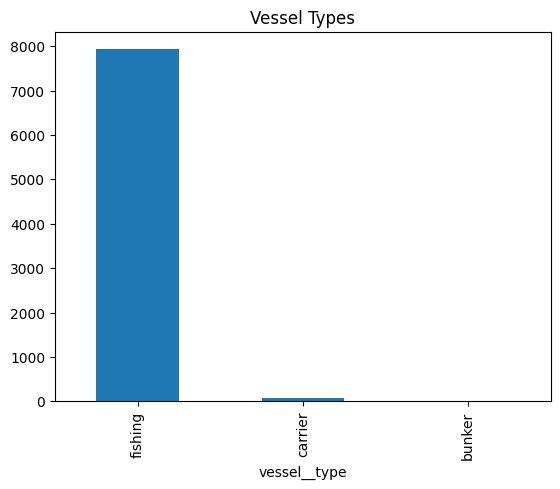

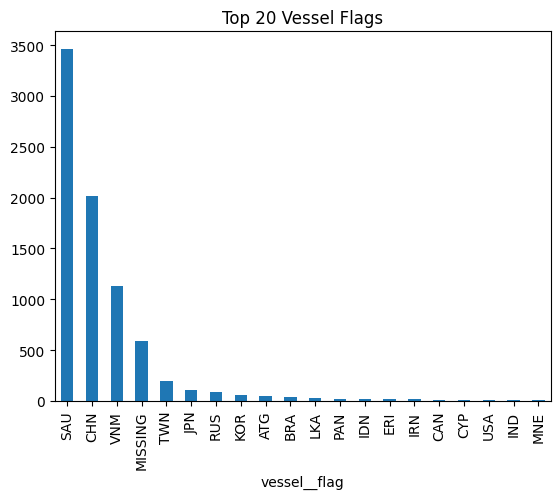

In [6]:
# distribution of vessel types and flags
df['vessel__type'].value_counts().plot(kind='bar', title="Vessel Types")
plt.show()

df['vessel__flag'].value_counts().head(20).plot(kind='bar', title="Top 20 Vessel Flags")
plt.show()

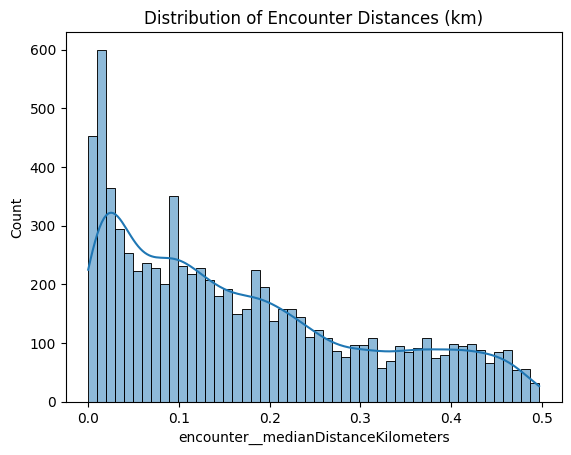

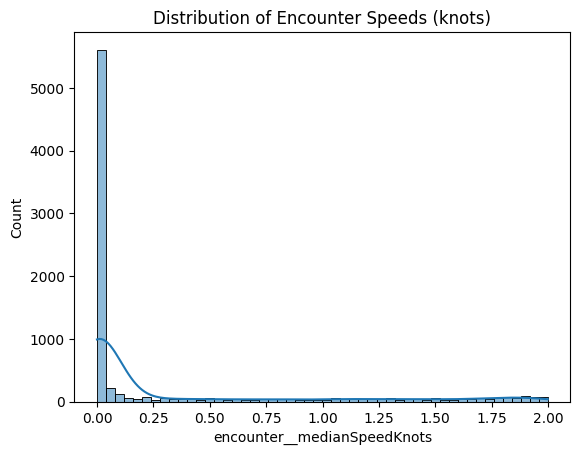

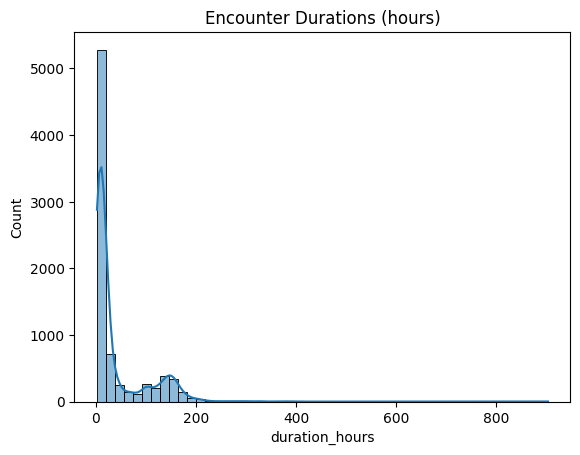

In [7]:
sns.histplot(df['encounter__medianDistanceKilometers'], bins=50, kde=True)
plt.title("Distribution of Encounter Distances (km)")
plt.show()

sns.histplot(df['encounter__medianSpeedKnots'], bins=50, kde=True)
plt.title("Distribution of Encounter Speeds (knots)")
plt.show()

sns.histplot(df['duration_hours'], bins=50, kde=True)
plt.title("Encounter Durations (hours)")
plt.show()

encounter__potentialRisk
False    7922
True       78
Name: count, dtype: int64


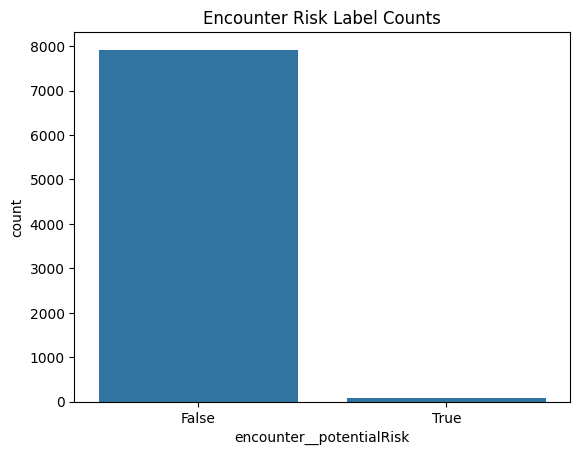

In [8]:
print(df['encounter__potentialRisk'].value_counts())
sns.countplot(x="encounter__potentialRisk", data=df)
plt.title("Encounter Risk Label Counts")
plt.show()

<h4>CLASSIFICATION</h4>

- the encounter distance, speed and duration are right-skewed so might need to apply log transform
- might also need make sure that all the features are all on the same scale

<h4>ASSOCIATION</h4>

In [36]:
# Keep only top-k categories and group the rest as Other.
def keep_top_k(df, col, k=8):
    top = df[col].value_counts().index[:k]
    df[col] = df[col].where(df[col].isin(top), other='Other')
    return df

df = keep_top_k(df, 'vessel__flag', k=10)
df = keep_top_k(df, 'vessel__type', k=10)
df = keep_top_k(df, 'encounter__vessel__flag', k=10)
df = keep_top_k(df, 'encounter__vessel__type', k=10)

In [37]:
def log_and_qbin(series, q=4, labels=None, prefix=None):
    s = np.log1p(series)                      # dampen skew
    try:
        cats = pd.qcut(s, q=q, labels=labels, duplicates='drop')
    except Exception:
        cats = pd.cut(s, bins=q, labels=labels)
    cats = cats.astype(str)
    if prefix:
        cats = prefix + '=' + cats
    return cats

# Example: create binned columns
df['duration_bin'] = log_and_qbin(df['duration_hours'], q=4, prefix='duration')
df['speed_bin'] = log_and_qbin(df['encounter__medianSpeedKnots'], q=4, prefix='speed')
df['encounter_dist_bin'] = log_and_qbin(df['encounter__medianDistanceKilometers'], q=4, prefix='enc_dist')
df['shore_start_bin'] = log_and_qbin(df['distances__startDistanceFromShoreKm'], q=4, prefix='shore_start')
df['port_start_bin'] = log_and_qbin(df['distances__startDistanceFromPortKm'], q=4, prefix='port_start')

In [40]:
def row_to_items(row):
    items = []
    # categorical
    items.append(f"vessel_type={row['vessel__type']}")
    items.append(f"vessel_flag={row['vessel__flag']}")
    items.append(f"enc_vessel_type={row['encounter__vessel__type']}")
    items.append(f"enc_vessel_flag={row['encounter__vessel__flag']}")
    # binned numeric (already prefixed)
    items.append(str(row['duration_bin']))
    items.append(str(row['speed_bin']))
    items.append(str(row['encounter_dist_bin']))
    items.append(str(row['shore_start_bin']))
    items.append(str(row['port_start_bin']))
    # temporal
    items.append(f"start_hour={row['start'].hour}")
    # Risk label (very important)
    items.append(f"Risk={row['encounter__potentialRisk']}")
    return items

transactions = df.apply(row_to_items, axis=1).tolist()
transactions[0:2]

[['vessel_type=fishing',
  'vessel_flag=CHN',
  'enc_vessel_type=fishing',
  'enc_vessel_flag=CHN',
  'duration=(3.669, 6.807]',
  'speed=(0.003, 0.0119]',
  'enc_dist=(0.23, 0.403]',
  'shore_start=(0.693, 3.932]',
  'port_start=(2.703, 2.948]',
  'start_hour=6',
  'Risk=False'],
 ['vessel_type=fishing',
  'vessel_flag=CHN',
  'enc_vessel_type=fishing',
  'enc_vessel_flag=CHN',
  'duration=(3.669, 6.807]',
  'speed=(0.003, 0.0119]',
  'enc_dist=(0.23, 0.403]',
  'shore_start=(0.693, 3.932]',
  'port_start=(2.703, 2.948]',
  'start_hour=6',
  'Risk=False']]

One-hot encoding 

In [43]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions, sparse=False)
df_trans = pd.DataFrame(te_ary, columns=te.columns_).astype(int)

# sanity check: number of rows
n_rows = df_trans.shape[0]
print("rows:", n_rows)
df_trans.head(5)

rows: 8000


,Risk=False,Risk=True,"duration=(1.1520000000000001, 2.015]","duration=(2.015, 2.708]","duration=(2.708, 3.669]","duration=(3.669, 6.807]","enc_dist=(-0.001, 0.0497]","enc_dist=(0.0497, 0.128]","enc_dist=(0.128, 0.23]","enc_dist=(0.23, 0.403]",...,vessel_flag=KOR,vessel_flag=MISSING,vessel_flag=Other,vessel_flag=RUS,vessel_flag=SAU,vessel_flag=TWN,vessel_flag=VNM,vessel_type=bunker,vessel_type=carrier,vessel_type=fishing
0,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,1,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


Create a balanced sample: keep all positives and randomly sample negatives

In [47]:
# undersample negatives
pos_df = df[df['encounter__potentialRisk'] == True]
neg_df = df[df['encounter__potentialRisk'] == False]
sample_neg = neg_df.sample(n=min(len(neg_df), len(pos_df)*10), random_state=42)  # 10x negatives
df_bal = pd.concat([pos_df, sample_neg]).reset_index(drop=True)

# transactions for balanced
transactions_bal = df_bal.apply(row_to_items, axis=1).tolist()
te_bal = TransactionEncoder()
te_bal_ary = te_bal.fit(transactions_bal).transform(transactions_bal)
df_bal_trans = pd.DataFrame(te_bal_ary, columns=te_bal.columns_)

# run apriori
min_support_bal = 0.02   # tweak: 2% of balanced sample
freq_itemsets_bal = apriori(df_bal_trans, min_support=min_support_bal, use_colnames=True)
rules_bal = association_rules(freq_itemsets_bal, metric='confidence', min_threshold=0.4)

# keep only rules where consequent contains 'Risk=True'
rules_bal = rules_bal[rules_bal['consequents'].apply(lambda c: 'Risk=True' in c)]
# add absolute counts
rules_bal['antecedent_count'] = rules_bal['support'] * len(df_bal_trans)
rules_bal = rules_bal.sort_values(['lift','confidence','antecedent_count'], ascending=[False,False,False])
rules_bal.head(30)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,antecedent_count
42140,"(vessel_flag=Other, port_start=(4.416, 7.536],...","(Risk=True, enc_vessel_flag=Other)",0.029138,0.026807,0.020979,0.720000,26.859130,1.0,0.020198,3.475691,0.991663,0.600000,0.712287,0.751304,18.0
102965,"(vessel_flag=Other, port_start=(4.416, 7.536],...","(Risk=True, enc_vessel_flag=Other)",0.029138,0.026807,0.020979,0.720000,26.859130,1.0,0.020198,3.475691,0.991663,0.600000,0.712287,0.751304,18.0
102977,"(vessel_flag=Other, port_start=(4.416, 7.536],...","(shore_start=(3.932, 7.334], Risk=True, enc_ve...",0.029138,0.026807,0.020979,0.720000,26.859130,1.0,0.020198,3.475691,0.991663,0.600000,0.712287,0.751304,18.0
42148,"(vessel_flag=Other, port_start=(4.416, 7.536])","(speed=(0.147, 1.098], enc_vessel_flag=Other, ...",0.032634,0.025641,0.020979,0.642857,25.071429,1.0,0.020142,2.728205,0.992503,0.562500,0.633459,0.730519,18.0
102980,"(vessel_flag=Other, port_start=(4.416, 7.536],...","(speed=(0.147, 1.098], enc_vessel_flag=Other, ...",0.032634,0.025641,0.020979,0.642857,25.071429,1.0,0.020142,2.728205,0.992503,0.562500,0.633459,0.730519,18.0
102991,"(vessel_flag=Other, port_start=(4.416, 7.536])","(shore_start=(3.932, 7.334], speed=(0.147, 1.0...",0.032634,0.025641,0.020979,0.642857,25.071429,1.0,0.020142,2.728205,0.992503,0.562500,0.633459,0.730519,18.0
10521,"(vessel_flag=Other, speed=(0.147, 1.098])","(Risk=True, enc_vessel_flag=Other)",0.031469,0.026807,0.020979,0.666667,24.869565,1.0,0.020135,2.919580,0.990975,0.562500,0.657485,0.724638,18.0
42147,"(vessel_flag=Other, speed=(0.147, 1.098])","(port_start=(4.416, 7.536], Risk=True, enc_ves...",0.031469,0.026807,0.020979,0.666667,24.869565,1.0,0.020135,2.919580,0.990975,0.562500,0.657485,0.724638,18.0
42178,"(vessel_flag=Other, shore_start=(3.932, 7.334]...","(Risk=True, enc_vessel_flag=Other)",0.031469,0.026807,0.020979,0.666667,24.869565,1.0,0.020135,2.919580,0.990975,0.562500,0.657485,0.724638,18.0
42185,"(vessel_flag=Other, speed=(0.147, 1.098])","(shore_start=(3.932, 7.334], Risk=True, enc_ve...",0.031469,0.026807,0.020979,0.666667,24.869565,1.0,0.020135,2.919580,0.990975,0.562500,0.657485,0.724638,18.0


Filter and prune redundant rules

In [48]:
# filtering thresholds (tune)
min_conf = 0.5
min_lift = 2.0
filtered = rules_bal[(rules_bal['confidence'] >= min_conf) & (rules_bal['lift'] >= min_lift)]

# remove redundancy: if antecedent A subset of B and B has higher lift, drop A
def remove_redundant(rules_df):
    to_drop = set()
    for i, r1 in rules_df.iterrows():
        for j, r2 in rules_df.iterrows():
            if i == j:
                continue
            if r1['consequents'] == r2['consequents'] and r1['antecedents'].issubset(r2['antecedents']) and r1['lift'] <= r2['lift']:
                to_drop.add(i)
                break
    return rules_df.drop(index=list(to_drop))

filtered_pruned = remove_redundant(filtered)
filtered_pruned.sort_values(['lift','confidence'], ascending=[False,False]).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,antecedent_count
0,"(vessel_flag=Other, port_start=(4.416, 7.536],...","(Risk=True, enc_vessel_flag=Other)",0.029138,0.026807,0.020979,0.720000,26.859130,1.0,0.020198,3.475691,0.991663,0.600000,0.712287,0.751304,18.0
1,"(vessel_flag=Other, port_start=(4.416, 7.536],...","(shore_start=(3.932, 7.334], Risk=True, enc_ve...",0.029138,0.026807,0.020979,0.720000,26.859130,1.0,0.020198,3.475691,0.991663,0.600000,0.712287,0.751304,18.0
2,"(vessel_flag=Other, port_start=(4.416, 7.536],...","(speed=(0.147, 1.098], enc_vessel_flag=Other, ...",0.032634,0.025641,0.020979,0.642857,25.071429,1.0,0.020142,2.728205,0.992503,0.562500,0.633459,0.730519,18.0
3,"(vessel_flag=Other, port_start=(4.416, 7.536])","(shore_start=(3.932, 7.334], speed=(0.147, 1.0...",0.032634,0.025641,0.020979,0.642857,25.071429,1.0,0.020142,2.728205,0.992503,0.562500,0.633459,0.730519,18.0
4,"(vessel_flag=Other, shore_start=(3.932, 7.334]...","(port_start=(4.416, 7.536], Risk=True, enc_ves...",0.031469,0.026807,0.020979,0.666667,24.869565,1.0,0.020135,2.919580,0.990975,0.562500,0.657485,0.724638,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,"(shore_start=(3.932, 7.334], speed=(0.147, 1.0...",(Risk=True),0.093240,0.090909,0.047786,0.512500,5.637500,1.0,0.039309,1.864802,0.907204,0.350427,0.463750,0.519071,41.0
151,"(speed=(0.147, 1.098], enc_dist=(-0.001, 0.049...","(port_start=(4.416, 7.536], Risk=True)",0.054779,0.090909,0.027972,0.510638,5.617021,1.0,0.022992,1.857708,0.869605,0.237624,0.461702,0.409165,24.0
152,"(port_start=(4.416, 7.536], vessel_type=fishin...","(shore_start=(3.932, 7.334], Risk=True)",0.095571,0.090909,0.047786,0.500000,5.500000,1.0,0.039097,1.818182,0.904639,0.344538,0.450000,0.512821,41.0
153,"(duration=(1.1520000000000001, 2.015], shore_s...","(port_start=(4.416, 7.536], Risk=True)",0.044289,0.090909,0.022145,0.500000,5.500000,1.0,0.018118,1.818182,0.856098,0.195876,0.450000,0.371795,19.0


Split into train test to evaluate

In [59]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.3, stratify=df['encounter__potentialRisk'], random_state=42)

# create transactions for train/test using same itemization function
transactions_train = df_train.apply(row_to_items, axis=1).tolist()
transactions_test = df_test.apply(row_to_items, axis=1).tolist()

te_train = TransactionEncoder()
te_train_ary = te_train.fit(transactions_train).transform(transactions_train)
df_train_trans = pd.DataFrame(te_train_ary, columns=te_train.columns_)

te_test = TransactionEncoder()
te_test_ary = te_test.fit(transactions_test).transform(transactions_test)  # note: ensure columns alignment is managed
df_test_trans = pd.DataFrame(te_test_ary, columns=te_test.columns_)

# For a given rule (antecedents -> 'Risk=True'), compute test confidence:
def test_confidence(rule_antecedents, df_test_trans):
    # rule_antecedents: frozenset of strings like {'vessel_type=Tanker', 'speed=...'}
    antecedents = list(rule_antecedents)
    # if any antecedent not present as column in test, confidence undefined
    for a in antecedents:
        if a not in df_test_trans.columns:
            return np.nan
    antecedent_mask = df_test_trans[antecedents].all(axis=1)
    antecedent_count = antecedent_mask.sum()
    if antecedent_count == 0:
        return np.nan
    # check Risk=True column
    if 'Risk=True' not in df_test_trans.columns:
        return np.nan
    both_count = (antecedent_mask & df_test_trans['Risk=True']).sum()
    return both_count / antecedent_count

# apply to filtered_pruned
filtered_pruned['test_confidence'] = filtered_pruned['antecedents'].apply(lambda a: test_confidence(a, df_test_trans))

# sort rulws by lift, confidence, test_confidence
filtered_pruned.sort_values(['lift','confidence','test_confidence'], ascending=[False,False,False]).reset_index(drop=True)
filtered_pruned.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,antecedent_count,test_confidence
102965,"(vessel_flag=Other, port_start=(4.416, 7.536],...","(Risk=True, enc_vessel_flag=Other)",0.029138,0.026807,0.020979,0.720000,26.859130,1.0,0.020198,3.475691,0.991663,0.600000,0.712287,0.751304,18.0,0.240000
102977,"(vessel_flag=Other, port_start=(4.416, 7.536],...","(shore_start=(3.932, 7.334], Risk=True, enc_ve...",0.029138,0.026807,0.020979,0.720000,26.859130,1.0,0.020198,3.475691,0.991663,0.600000,0.712287,0.751304,18.0,0.230769
102980,"(vessel_flag=Other, port_start=(4.416, 7.536],...","(speed=(0.147, 1.098], enc_vessel_flag=Other, ...",0.032634,0.025641,0.020979,0.642857,25.071429,1.0,0.020142,2.728205,0.992503,0.562500,0.633459,0.730519,18.0,0.222222
102991,"(vessel_flag=Other, port_start=(4.416, 7.536])","(shore_start=(3.932, 7.334], speed=(0.147, 1.0...",0.032634,0.025641,0.020979,0.642857,25.071429,1.0,0.020142,2.728205,0.992503,0.562500,0.633459,0.730519,18.0,0.206897
102978,"(vessel_flag=Other, shore_start=(3.932, 7.334]...","(port_start=(4.416, 7.536], Risk=True, enc_ves...",0.031469,0.026807,0.020979,0.666667,24.869565,1.0,0.020135,2.919580,0.990975,0.562500,0.657485,0.724638,18.0,0.200000
102990,"(vessel_flag=Other, speed=(0.147, 1.098])","(port_start=(4.416, 7.536], shore_start=(3.932...",0.031469,0.026807,0.020979,0.666667,24.869565,1.0,0.020135,2.919580,0.990975,0.562500,0.657485,0.724638,18.0,0.136364
102969,"(port_start=(4.416, 7.536], shore_start=(3.932...","(vessel_flag=Other, Risk=True)",0.032634,0.026807,0.020979,0.642857,23.981366,1.0,0.020104,2.724942,0.990629,0.545455,0.633020,0.712733,18.0,0.214286
102983,"(port_start=(4.416, 7.536], speed=(0.147, 1.09...","(vessel_flag=Other, shore_start=(3.932, 7.334]...",0.032634,0.026807,0.020979,0.642857,23.981366,1.0,0.020104,2.724942,0.990629,0.545455,0.633020,0.712733,18.0,0.214286
102984,"(shore_start=(3.932, 7.334], speed=(0.147, 1.0...","(vessel_flag=Other, port_start=(4.416, 7.536],...",0.033800,0.026807,0.020979,0.620690,23.154423,1.0,0.020073,2.565692,0.990283,0.529412,0.610242,0.701649,18.0,0.206897
102986,"(port_start=(4.416, 7.536], shore_start=(3.932...","(vessel_flag=Other, speed=(0.147, 1.098], Risk...",0.036131,0.025641,0.020979,0.580645,22.645161,1.0,0.020053,2.323471,0.991670,0.514286,0.569610,0.699413,18.0,0.212121


To get top actionable rules

In [50]:
# Step 1: focus on Risk=True rules
rules_risk = filtered_pruned.copy()

# Step 2: filter by minimum counts and test confidence
rules_risk = rules_risk[
    (rules_risk['antecedent_count'] >= 10) & 
    (rules_risk['test_confidence'] >= 0.07) &    # at least 7% risky in test
    (rules_risk['lift'] >= 5)                     # 5x uplift over baseline
]

# Step 3: rank by lift * test_confidence (combined score)
rules_risk['score'] = rules_risk['lift'] * rules_risk['test_confidence']

# Step 4: sort
rules_top = rules_risk.sort_values(['score','antecedent_count'], ascending=[False,False])

# Step 5: take top 10
top10 = rules_top.head(10)
top10[['antecedents', 'consequents', 'support', 'confidence', 'consequent support', 'lift' ]]

,antecedents,consequents,support,confidence,consequent support,lift
102965,"(vessel_flag=Other, port_start=(4.416, 7.536],...","(Risk=True, enc_vessel_flag=Other)",0.020979,0.720000,0.026807,26.859130
102977,"(vessel_flag=Other, port_start=(4.416, 7.536],...","(shore_start=(3.932, 7.334], Risk=True, enc_ve...",0.020979,0.720000,0.026807,26.859130
102980,"(vessel_flag=Other, port_start=(4.416, 7.536],...","(speed=(0.147, 1.098], enc_vessel_flag=Other, ...",0.020979,0.642857,0.025641,25.071429
102991,"(vessel_flag=Other, port_start=(4.416, 7.536])","(shore_start=(3.932, 7.334], speed=(0.147, 1.0...",0.020979,0.642857,0.025641,25.071429
102969,"(port_start=(4.416, 7.536], shore_start=(3.932...","(vessel_flag=Other, Risk=True)",0.020979,0.642857,0.026807,23.981366
102983,"(port_start=(4.416, 7.536], speed=(0.147, 1.09...","(vessel_flag=Other, shore_start=(3.932, 7.334]...",0.020979,0.642857,0.026807,23.981366
102978,"(vessel_flag=Other, shore_start=(3.932, 7.334]...","(port_start=(4.416, 7.536], Risk=True, enc_ves...",0.020979,0.666667,0.026807,24.869565
102986,"(port_start=(4.416, 7.536], shore_start=(3.932...","(vessel_flag=Other, speed=(0.147, 1.098], Risk...",0.020979,0.580645,0.025641,22.645161
102984,"(shore_start=(3.932, 7.334], speed=(0.147, 1.0...","(vessel_flag=Other, port_start=(4.416, 7.536],...",0.020979,0.620690,0.026807,23.154423
102995,"(port_start=(4.416, 7.536], enc_vessel_flag=Ot...","(vessel_flag=Other, shore_start=(3.932, 7.334]...",0.020979,0.562500,0.025641,21.937500


Rule 0:
If vessel_flag=Other AND port_start ~4.4–7.5 km AND maybe shore_start 3.9–7.3 km
Then Risk=True AND enc_vessel_flag=Other
Interpretation: Encounters near ports/shore at these distances, involving vessels with flag="Other" (non-major flag states), are disproportionately risky.
Actionable: Monitoring “Other flag” vessels close to ports/shore could catch higher-risk encounters. <br></br>
Rule 2:
If vessel_flag=Other AND port_start 4.4–7.5 km
Then speed=0.15–1.1 knots AND enc_vessel_flag=Other AND Risk=True
Interpretation: Slow-moving vessels (near stationary) of “Other” flags, near ports, have high risk encounters with other similar vessels.
Actionable: Focus on low-speed loitering vessels around ports → likely risky encounters.<br></br>
Rule 4:
If vessel_flag=Other
Then shore_start ~3.9–7.3 km AND Risk=True
Interpretation: Proximity to shore + “Other flag” is a risk signal.
Lower ranked rules (support ~4–5%):
These add nuance — fishing vessels encountering other fishing vessels at close distances, or encounters of short duration but near shore/ports also show elevated risks.

In [ ]:
# the top 10 encounter vessel flags
df['encounter__vessel__flag'].value_counts().head(10)

encounter__vessel__flag
SAU        3462
CHN        2016
VNM        1133
MISSING     590
Other       266
TWN         195
JPN         108
RUS          92
KOR          56
ATG          46
Name: count, dtype: int64

In [56]:
# encounter vessel flags not in the top 10
set(df['encounter__vessel__flag'].unique()) - set(df['encounter__vessel__flag'].value_counts().head(10).index)

{'BRA'}

In [58]:
# vessel_flag = 'Other' means not in the top 10 flags
set(df['vessel__flag'].unique()) - set(df['vessel__flag'].value_counts().head(10).index)

{'BRA'}

- Essentially, BRA is the "other" flag
- 0,4,5,7,8 might be the more accurate rules
